### Libraries used


In [1]:
import re
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from bs4 import BeautifulSoup
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Crawling Data

## Get URLs to download and player names


In [2]:
def getLink():
  links = []
  player_name = []
  parser = 'html.parser'
  resp = urllib.request.urlopen("http://www.rsssf.com/players/players-in-ec.html")
  soup = BeautifulSoup(resp, parser, from_encoding=resp.info().get_param('charset'))

  for link in soup.find_all('a', href=True):
    str1 = 'http://www.rsssf.com/players/' + link['href']
    links.append(str1)
    print(str1)

  r = requests.get("http://www.rsssf.com/players/players-in-ec.html")
  htmlParse  = BeautifulSoup(r.content, 'html.parser')
  text = htmlParse.get_text()
  data = text.split("\n")

  for each in data:
    each = each.replace('\r','')
    str1 = re.split(r'\s{2,}', each)
    if len(str1)>=3 and not str1[0] == '' and not str1[0] == 'Player':
      player_name.append(str1[0])
  return links, player_name
links, player_name = getLink()

http://www.rsssf.com/players/maldini-in-ec.html
http://www.rsssf.com/players/seedorf-in-ec.html
http://www.rsssf.com/players/kahn-in-ec.html
http://www.rsssf.com/players/rcarlos-in-ec.html
http://www.rsssf.com/players/figo-in-ec.html
http://www.rsssf.com/players/henry-in-ec.html
http://www.rsssf.com/players/raul-in-ec.html
http://www.rsssf.com/players/giggs-in-ec.html
http://www.rsssf.com/players/fdeboer-in-ec.html
http://www.rsssf.com/players/makelele-in-ec.html
http://www.rsssf.com/players/shevchenko-in-ec.html
http://www.rsssf.com/players/strand-in-ec.html
http://www.rsssf.com/players/zanetti-in-ec.html
http://www.rsssf.com/players/scholes-in-ec.html
http://www.rsssf.com/players/carragher-in-ec.html
http://www.rsssf.com/players/cocu-in-ec.html
http://www.rsssf.com/players/morientes-in-ec.html
http://www.rsssf.com/players/nedved-in-ec.html
http://www.rsssf.com/players/bergomi-in-ec.html
http://www.rsssf.com/players/gneville-in-ec.html
http://www.rsssf.com/players/costacurta-in-ec.htm

## Crawling data using BeautifulSoup

In [3]:
def getres(links, player_names):
  for (url, player_name) in zip(links, player_names):
    print(url)
    print(player_name)
    r = requests.get(url)
    htmlParse  = BeautifulSoup(r.content, 'html.parser')
    text = htmlParse.get_text()
    data = text.split("\n")

    for each in data:
      each = each.replace('\r','')
      str1 = re.split(r'\s{2,}', each)
      if not (str1[0] == ' ' or str1[0]==''):
        try:
          if len(str1) == 1:
            text = str1[0].split(' ')
            if 'Cup' in each and '-' in text[-1]:
              cup_name = ' '.join(text[:-1])
              season_year = text[-1].split('-')
              start_year = int(season_year[0])
              end_year = int(season_year[1])
          elif len(str1) >= 3:
            match_num = str1[0].replace(' ', '')
            match_num = int(match_num.replace('.', ''))
            team = str1[1]
            score = str1[2]
            score = score.replace(' ', '')
            score = score.split('-')
            score1 = int(score[0])
            score2 = int(score[1])
            if score1 < 50 and score2 < 50:
              if len(str1) == 3:
                goal = 0
                goal_time = '-'
              elif len(str1) == 5:
                goal_str = str1[3].split(' ')
                goal = int(goal_str[0])
                time_str = str1[4]
                time_str = time_str.replace(' ', '')
                goal_time = time_str
              Player.append(player_name)
              MatchNum.append(match_num)
              CupName.append(cup_name)
              StartYear.append(start_year)
              EndYear.append(end_year)
              TeamName.append(team)
              GF.append(score1)
              GA.append(score2)
              Goal.append(goal)
              GoalTime.append(goal_time)     
        except:
          pass

In [4]:
Player = []
MatchNum = []
CupName = []
StartYear = []
EndYear = []
TeamName = []
GF = []
GA = []
Goal = []
GoalTime = []
getres(links, player_name)   

http://www.rsssf.com/players/maldini-in-ec.html
Paolo Maldini
http://www.rsssf.com/players/seedorf-in-ec.html
Clarence Seedorf
http://www.rsssf.com/players/kahn-in-ec.html
Oliver Kahn
http://www.rsssf.com/players/rcarlos-in-ec.html
Roberto Carlos
http://www.rsssf.com/players/figo-in-ec.html
Luis Filipe Madeira Caeiro "Figo"
http://www.rsssf.com/players/henry-in-ec.html
Thierry Henry
http://www.rsssf.com/players/raul-in-ec.html
Raúl González Blanco
http://www.rsssf.com/players/giggs-in-ec.html
Ryan Giggs
http://www.rsssf.com/players/fdeboer-in-ec.html
Frank de Boer
http://www.rsssf.com/players/makelele-in-ec.html
Claude Makélélé
http://www.rsssf.com/players/shevchenko-in-ec.html
Andriy Shevchenko
http://www.rsssf.com/players/strand-in-ec.html
Roar Strand
http://www.rsssf.com/players/zanetti-in-ec.html
Javier Zanetti
http://www.rsssf.com/players/scholes-in-ec.html
Paul Scholes
http://www.rsssf.com/players/carragher-in-ec.html
James Carragher
http://www.rsssf.com/players/cocu-in-ec.html
P

http://www.rsssf.com/players/kewell-in-ec.html
Harry Kewell
http://www.rsssf.com/players/kezman-in-ec.html
Mateja Kezman
http://www.rsssf.com/players/litmanen-in-ec.html
Jari Litmanen
http://www.rsssf.com/players/migueli-in-ec.html
Migueli
http://www.rsssf.com/players/tsmith-in-ec.html
Tommy Smith
http://www.rsssf.com/players/rdeboer-in-ec.html
Ronald de Boer
http://www.rsssf.com/players/frings-in-ec.html
Torsten Frings
http://www.rsssf.com/players/rkoeman-in-ec.html
Ronald Koeman
http://www.rsssf.com/players/wvdkerkhof-in-ec.html
Willy van de Kerkhof
http://www.rsssf.com/players/icordoba-in-ec.html
Iván Ramiro Córdoba Sepulveda
http://www.rsssf.com/players/djordjevic-in-ec.html
Predrag Djordjevic
http://www.rsssf.com/players/haan-in-ec.html
Arend "Arie" Haan
http://www.rsssf.com/players/roykeane-in-ec.html
Roy Keane
http://www.rsssf.com/players/kohler-in-ec.html
Jürgen Kohler
http://www.rsssf.com/players/tlinke-in-ec.html
Thomas Linke
http://www.rsssf.com/players/smaier-in-ec.html
Jos

http://www.rsssf.com/players/jterry-in-ec.html
Gianni Rivera
http://www.rsssf.com/players/bergdoelmo-in-ec.html
Georg Schwarzenbeck
http://www.rsssf.com/players/broos-in-ec.html
David Seaman
http://www.rsssf.com/players/degoey-in-ec.html
John Terry
http://www.rsssf.com/players/lacatus-in-ec.html
Rui Gil Soares de Barros
http://www.rsssf.com/players/ooijer-in-ec.html
Giuseppe Baresi
http://www.rsssf.com/players/jacketkrone-in-ec.html
André Bergdølmo
http://www.rsssf.com/players/shatskikh-in-ec.html
Hugo Broos
http://www.rsssf.com/players/solari-in-ec.html
Tarciso Burgnich
http://www.rsssf.com/players/trezeguet-in-ec.html
Ed de Goey
http://www.rsssf.com/players/chendo-in-ec.html
Marius Mihai Lacatus
http://www.rsssf.com/players/bkalou-in-ec.html
Oleg Romanovich Luzhny
http://www.rsssf.com/players/rkennedy-in-ec.html
Andre Ooijer
http://www.rsssf.com/players/lorimer-in-ec.html
Harald "Toni" Schumacher
http://www.rsssf.com/players/amuehren-in-ec.html
Maksim Shatskikh
http://www.rsssf.com/p

http://www.rsssf.com/players/geels-in-ec.html
Michel Platini
http://www.rsssf.com/players/kovacevic-in-ec.html
Dieter Hoeneß
http://www.rsssf.com/players/nikolaidis-in-ec.html
Tamagnini M.Gomes Baptista "Nene"
http://www.rsssf.com/players/warzycha-in-ec.html
Giovane Élber
http://www.rsssf.com/players/etoo-in-ec.html
Nuno Gomes
http://www.rsssf.com/players/jbosman-in-ec.html
Luis Enrique Martínez
http://www.rsssf.com/players/blokhin-in-ec.html
Luis Filipe Madeira Caeiro "Figo"
http://www.rsssf.com/players/kezman-in-ec.html
Vágner Silva da Souza "Vágner Love" 27
http://www.rsssf.com/players/schoenmaker-in-ec.html
Luis Aragones Suárez
http://www.rsssf.com/players/chiesa-in-ec.html
Maciej Zurawski
http://www.rsssf.com/players/yuran-in-ec.html
Jürgen Klinsmann
http://www.rsssf.com/players/zlvujovic-in-ec.html
Johann "Hans" Krankl
http://www.rsssf.com/players/saravakos-in-ec.html
Michael Owen
http://www.rsssf.com/players/koller-in-ec.html
Emilio Butragueño Santos
http://www.rsssf.com/players

# Convert to DataFrame

In [5]:
df = pd.DataFrame(
    {'Player':Player,
     'MatchNum': MatchNum,
     'CupName':CupName,
     'StartYear':StartYear,
     'EndYear':EndYear,
     'TeamName': TeamName,
     'GF': GF,
     'GA': GA,
     'Goal': Goal,
     'GoalTime': GoalTime,
    })
df

,Player,MatchNum,CupName,StartYear,EndYear,TeamName,GF,GA,Goal,GoalTime
0,Paolo Maldini,10,Champions Cup,1988,1989,FK Crvena zvezda,1,1,0,-
1,Paolo Maldini,11,Champions Cup,1988,1989,FK Crvena zvezda,1,1,0,-
2,Paolo Maldini,12,Champions Cup,1988,1989,Werder Bremen,1,0,0,-
3,Paolo Maldini,13,Champions Cup,1988,1989,Real Madrid,1,1,0,-
4,Paolo Maldini,14,Champions Cup,1988,1989,Real Madrid,5,0,0,-
...,...,...,...,...,...,...,...,...,...,...
21483,"José Martínez ""Pirri""",137,UEFA-Cup,2008,2009,Sheriff Tiraspol,1,0,0,-
21484,"José Martínez ""Pirri""",138,UEFA-Cup,2008,2009,Steaua Bucuresti,1,0,0,-
21485,"José Martínez ""Pirri""",139,UEFA-Cup,2008,2009,Steaua Bucuresti,3,1,0,-
21486,"José Martínez ""Pirri""",140,UEFA-Cup,2008,2009,FC Twente,1,0,0,-


# Pre-processing
Droping NAN values

In [6]:
df =df.dropna()
df

,Player,MatchNum,CupName,StartYear,EndYear,TeamName,GF,GA,Goal,GoalTime
0,Paolo Maldini,10,Champions Cup,1988,1989,FK Crvena zvezda,1,1,0,-
1,Paolo Maldini,11,Champions Cup,1988,1989,FK Crvena zvezda,1,1,0,-
2,Paolo Maldini,12,Champions Cup,1988,1989,Werder Bremen,1,0,0,-
3,Paolo Maldini,13,Champions Cup,1988,1989,Real Madrid,1,1,0,-
4,Paolo Maldini,14,Champions Cup,1988,1989,Real Madrid,5,0,0,-
...,...,...,...,...,...,...,...,...,...,...
21483,"José Martínez ""Pirri""",137,UEFA-Cup,2008,2009,Sheriff Tiraspol,1,0,0,-
21484,"José Martínez ""Pirri""",138,UEFA-Cup,2008,2009,Steaua Bucuresti,1,0,0,-
21485,"José Martínez ""Pirri""",139,UEFA-Cup,2008,2009,Steaua Bucuresti,3,1,0,-
21486,"José Martínez ""Pirri""",140,UEFA-Cup,2008,2009,FC Twente,1,0,0,-


#EDA(Exploratory Data Analysis)

## Get the data with goals by player

In [7]:
df_goal = df[df['Goal']>0]
df_goal

,Player,MatchNum,CupName,StartYear,EndYear,TeamName,GF,GA,Goal,GoalTime
20,Paolo Maldini,30,Champions Cup,1992,1993,Slovan Bratislava,1,0,1,(61)
33,Paolo Maldini,43,Champions Cup,1993,1994,Werder Bremen,2,1,1,(47)
170,Clarence Seedorf,28,Champions Cup,1998,1999,Internazionale,2,0,1,(90)
173,Clarence Seedorf,31,Champions Cup,1998,1999,Sturm Graz,5,1,1,(57)
174,Clarence Seedorf,32,Champions Cup,1998,1999,Internazionale,1,3,1,(59)
...,...,...,...,...,...,...,...,...,...,...
21417,Miroslav Klose,58,UEFA-Cup,1994,1995,Sporting CP Lisboa,1,2,1,(15)
21419,Miroslav Klose,60,UEFA-Cup,1994,1995,OB (Odense),3,2,1,(90)
21439,"José Martínez ""Pirri""",90,UEFA-Cup,2008,2009,AS Roma,4,2,1,(79)\t
21470,"José Martínez ""Pirri""",124,UEFA-Cup,2008,2009,MTK (Budapest),2,0,1,(15)\t


## Statistical Analysis

In [8]:
df.describe()

,MatchNum,StartYear,EndYear,GF,GA,Goal
count,2.148800e+04,21488.000000,21488.000000,21488.000000,21488.000000,21488.000000
mean,2.810958e+06,1993.446249,1994.460071,1.682195,1.036672,0.210071
std,8.205686e+07,11.609940,11.619668,1.530848,1.102574,0.511593
min,1.000000e+00,1955.000000,1957.000000,0.000000,0.000000,0.000000
25%,2.100000e+01,1986.000000,1987.000000,1.000000,0.000000,0.000000
50%,4.200000e+01,1998.000000,1999.000000,1.000000,1.000000,0.000000
75%,6.500000e+01,2002.000000,2003.000000,2.000000,2.000000,0.000000
max,3.506112e+09,2009.000000,2010.000000,14.000000,8.000000,5.000000


## Top 10 players has most goals

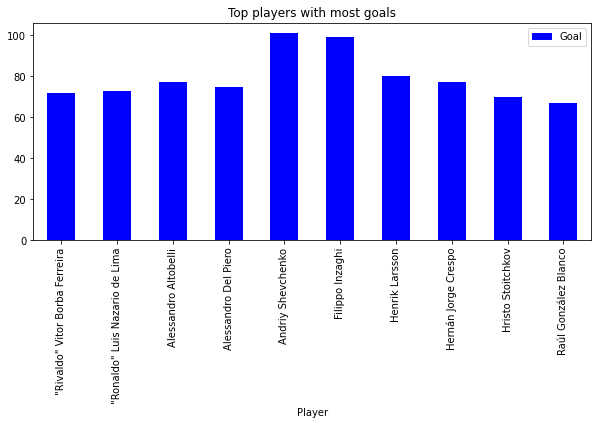

<Figure size 720x3600 with 0 Axes>

In [9]:
dfx = df.groupby('Player').sum()
# Top number of wins
from cycler import cycler
plt.rc('axes', prop_cycle=(cycler('color', ['b'])))
df10 = dfx.nlargest(10, 'Goal')
x = df10[['Goal']].groupby(['Player']).sum()
ax = x.plot(kind='bar', legend = True,figsize=(10,4))
plt.title('Top players with most goals')
plt.figure(figsize=(10,50))
plt.show()

## Total goals for each league

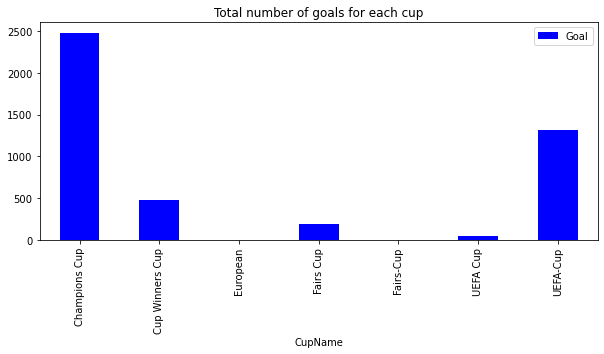

<Figure size 720x3600 with 0 Axes>

In [10]:
dfx = df.groupby('CupName').sum()
# Number of total goal for each cups
from cycler import cycler
plt.rc('axes', prop_cycle=(cycler('color', ['b'])))
df10 = dfx.nlargest(10, 'Goal')
x = df10[['Goal']].groupby(['CupName']).sum()
ax = x.plot(kind='bar', legend = True,figsize=(10,4))
plt.title('Total number of goals for each cup')
plt.figure(figsize=(10,50))
plt.show()

# Extract Data of special player and league

## Find the player name has the most goals

In [11]:
# Find the player with maximum goals
dfx = df.groupby('Player').sum()
df_max_player = dfx[dfx['Goal'] == max(dfx['Goal'])].index.tolist()
max_player = df_max_player[0]
max_player

'Andriy Shevchenko'

## Find the league has the most goals by selected player

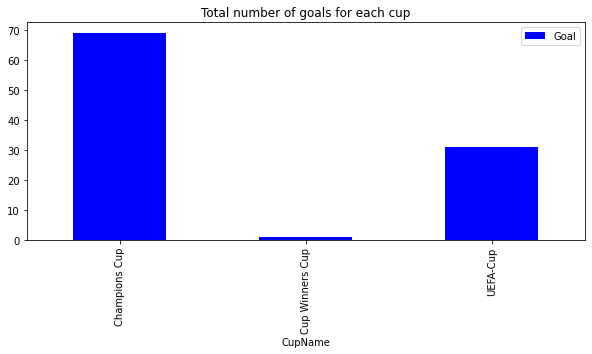

<Figure size 720x3600 with 0 Axes>

In [12]:
# Total points
df_max = df[df['Player'] == max_player]
df_max_cup = df_max.groupby('CupName').sum()

# Number of total goal for each cups
from cycler import cycler
plt.rc('axes', prop_cycle=(cycler('color', ['b'])))
df10 = df_max_cup.nlargest(10, 'Goal')
x = df10[['Goal']].groupby(['CupName']).sum()
ax = x.plot(kind='bar', legend = True,figsize=(10,4))
plt.title('Total number of goals for each cup')
plt.figure(figsize=(10,50))
plt.show()

In [13]:
df_max_cup

,MatchNum,StartYear,EndYear,GF,GA,Goal
CupName,,,,,,
Champions Cup,6800,263371,263503,226,115,69
Cup Winners Cup,333,11892,11898,8,6,1
UEFA-Cup,4768,143215,143287,125,77,31


In [14]:
df_cup = df_max_cup[df_max_cup['Goal'] == max(df_max_cup['Goal'])].index.tolist()
max_cup = df_cup[0]
max_cup

'Champions Cup'

## Extract data

In [15]:
df_player = df[df['Player'] == max_player]
df_player = df_player[df_player['CupName'] == max_cup]
df_player = df_player.sort_values(by = 'MatchNum',ascending=True)
df_player

,Player,MatchNum,CupName,StartYear,EndYear,TeamName,GF,GA,Goal,GoalTime
15665,Andriy Shevchenko,1,Champions Cup,1974,1975,1.FC Magdeburg,3,2,1,(51)
15666,Andriy Shevchenko,2,Champions Cup,1974,1975,Ararat Yerevan,2,0,0,-
15667,Andriy Shevchenko,3,Champions Cup,1974,1975,Ararat Yerevan,0,1,0,-
15668,Andriy Shevchenko,4,Champions Cup,1974,1975,AS St.-Etienne,2,0,0,-
15669,Andriy Shevchenko,5,Champions Cup,1975,1976,Jeunesse d'Esch,5,0,2,(69/78)
...,...,...,...,...,...,...,...,...,...,...
1052,Andriy Shevchenko,107,Champions Cup,2005,2006,Rosenborg BK,1,1,1,(53)
1053,Andriy Shevchenko,108,Champions Cup,2005,2006,Schalke 04,2,0,0,-
1054,Andriy Shevchenko,109,Champions Cup,2005,2006,Rosenborg BK,4,0,0,-
1055,Andriy Shevchenko,110,Champions Cup,2005,2006,Valencia CF,0,0,0,-


# Define Dataset

## Add labels which denotes the score or not in given match by selected player

In [16]:
df_train = df_player[df_player['StartYear'] < max(df_player['StartYear'])]
df_train['Label'] = np.where(df_train['Goal']>0, 1, 0)
df_train

,Player,MatchNum,CupName,StartYear,EndYear,TeamName,GF,GA,Goal,GoalTime,Label
15665,Andriy Shevchenko,1,Champions Cup,1974,1975,1.FC Magdeburg,3,2,1,(51),1
15666,Andriy Shevchenko,2,Champions Cup,1974,1975,Ararat Yerevan,2,0,0,-,0
15667,Andriy Shevchenko,3,Champions Cup,1974,1975,Ararat Yerevan,0,1,0,-,0
15668,Andriy Shevchenko,4,Champions Cup,1974,1975,AS St.-Etienne,2,0,0,-,0
15669,Andriy Shevchenko,5,Champions Cup,1975,1976,Jeunesse d'Esch,5,0,2,(69/78),1
...,...,...,...,...,...,...,...,...,...,...,...
1025,Andriy Shevchenko,80,Champions Cup,2004,2005,Internazionale,2,0,1,(74),1
1026,Andriy Shevchenko,81,Champions Cup,2004,2005,Internazionale,1,0,1,(30),1
1027,Andriy Shevchenko,82,Champions Cup,2004,2005,PSV (Eindhoven),2,0,1,(42),1
1028,Andriy Shevchenko,83,Champions Cup,2004,2005,PSV (Eindhoven),1,3,1,(42),1


## Construct Train Dataset

In [17]:
X = df_train[['GF', 'GA', 'Goal']].values
y = df_train[['Label']].values

In [18]:
XX = []
yy = []
match_num = 5
for n in range(len(y) - match_num):
  data = X[n:n+match_num][:]
  XX.append(data.reshape(1,-1)[0])
  yy.append(y[n+match_num])
XX = np.array(XX)
yy = np.array(yy)

## Split dataset for Train and Test

In [19]:
X_train, X_test, y_train, y_test = train_test_split( XX, yy, test_size=0.20, random_state=42)

# Build the SVM model

## Build model using training dataset

In [20]:
clf = svm.SVC()
clf.fit(X_train, y_train)

SVC()

## Test Accuracy

In [21]:
y_pred = clf.predict(X_test)
print('Test Accuracy:', accuracy_score(y_pred, y_test))

Test Accuracy: 0.5


## Confusion Matrix of SVM model




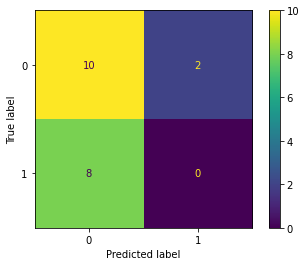

In [22]:
plot_confusion_matrix(clf, X_test, y_test)

## Classification Report

In [23]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.83      0.56      0.67        18
           1       0.00      0.00      0.00         2

    accuracy                           0.50        20
   macro avg       0.42      0.28      0.33        20
weighted avg       0.75      0.50      0.60        20



# Validate Model

[0.45 0.55 0.4  0.5  0.55]


Text(0.5, 1.0, 'Validation Accuracy')

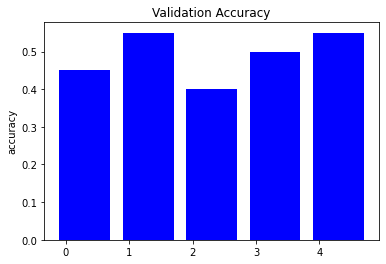

In [24]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator=clf, X=XX, y=yy, cv = 5, n_jobs = 4)
index = np.arange(5) + 0.3
print(scores)
plt.bar(index, scores)
plt.ylabel("accuracy")
plt.title('Validation Accuracy')

# Theoretical Question:
Can we predict if a player scored on first game? Based on his historic performance?

In [25]:
def predictScore(clf, year):
  df_train = df_player[df_player['StartYear'] < year]
  X = df_train[['GF', 'GA', 'Goal']].values
  data = X[-5:][:]
  data = data.reshape(1,-1)
  predScore = clf.predict(data)
  if predScore==0:
    print('The player will not score in the first game in the season ' + str(year) + '-' + str(year+1) + '.')
  else:
    print('The player will score in the first game in the season ' + str(year) + '-' + str(year+1) + '.')

In [26]:
year = 2004
predictScore(clf, year)

The player will not score in the first game in the season 2004-2005.
